# K-Means Clustering - Unsupervised Machine Learning

### Unsupervised Machine Learning - No Target Feature
### Cluster - Main Goal is to Classify similar Datapoints together

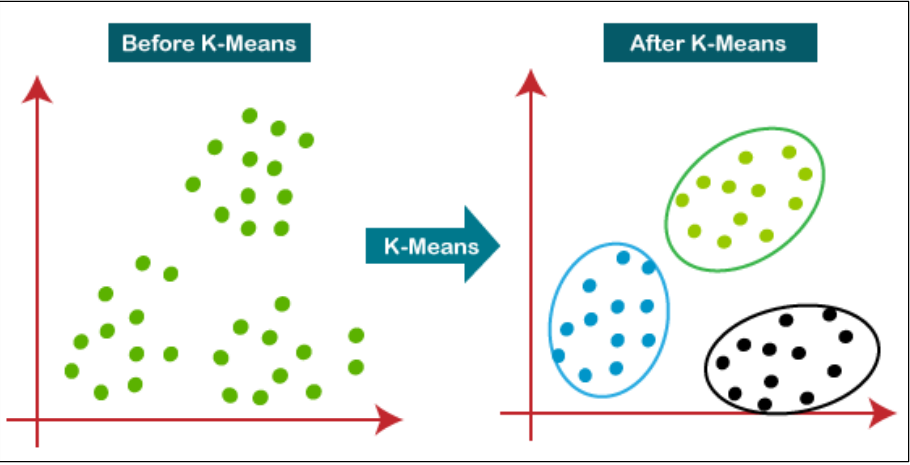

In [1]:
%pip install Yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd 
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income',
       'Spending']

In [9]:
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Categorize Similar Customers together on Basis of Income and Spending

### Get the Value of X

In [10]:
X = df[['Income', 'Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Visualize the Data with scatterplot

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

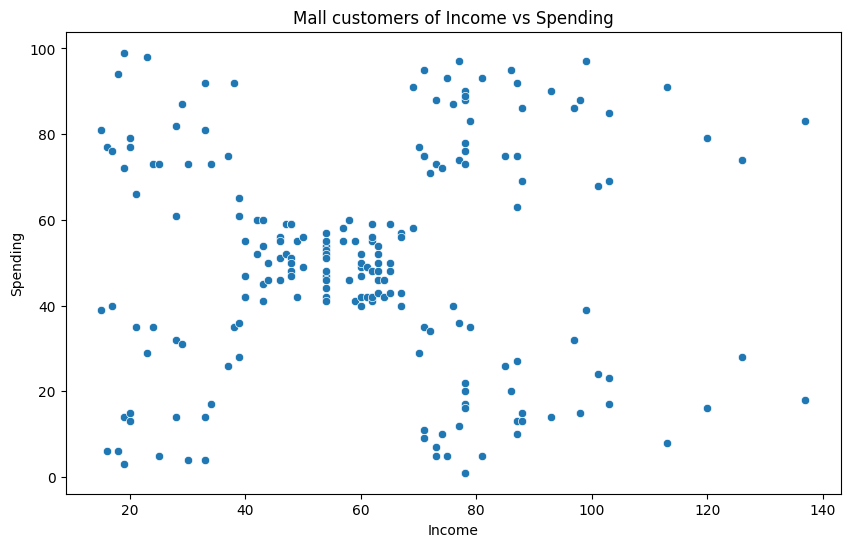

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Income', y='Spending')
plt.title('Mall customers of Income vs Spending')
plt.show()

### Preprocess the X Data

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [14]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Calculate Optimum numbers of cluster

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

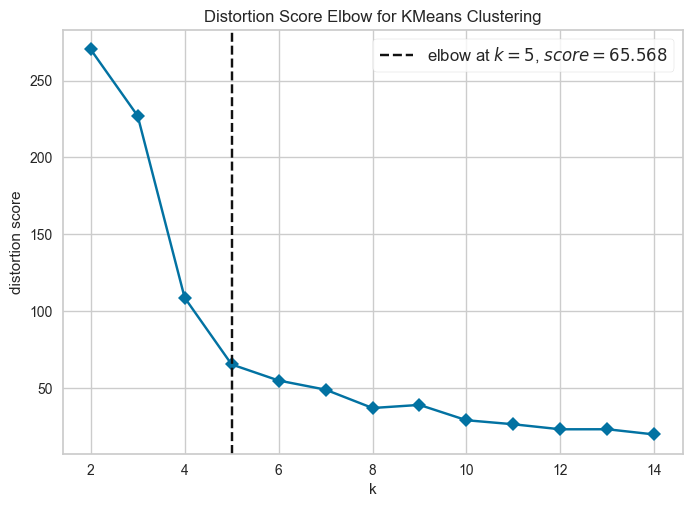

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [17]:
kelbow_visualizer(KMeans(), X_pre, k=(2, 15), timings=False)

### from elbow method select optimal cluster as 5

In [18]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [19]:
model.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

### Save the Labels in X DataFrame

In [20]:
X['Labels'] = model.labels_
X.head()

,Income,Spending,Labels
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [21]:
X['Labels'].unique()

array([4, 0, 2, 3, 1])

#### Check the Cluster

In [22]:
X[X['Labels']==0]

,Income,Spending,Labels
1,15,81,0
3,16,77,0
5,17,76,0
7,18,94,0
9,19,72,0
11,19,99,0
13,20,77,0
15,20,79,0
17,21,66,0
19,23,98,0


In [23]:
X[X['Labels']==1]

,Income,Spending,Labels
124,70,29,1
128,71,11,1
130,71,9,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
144,77,12,1
146,77,36,1
148,78,22,1


In [24]:
X[X['Labels']==2]

,Income,Spending,Labels
43,39,61,2
46,40,55,2
47,40,47,2
48,40,42,2
49,40,42,2
...,...,...,...
121,67,40,2
122,69,58,2
126,71,35,2
132,72,34,2


In [25]:
X[X['Labels']==3]

,Income,Spending,Labels
123,69,91,3
125,70,77,3
127,71,95,3
129,71,75,3
131,71,75,3
133,72,71,3
135,73,88,3
137,73,73,3
139,74,72,3
141,75,93,3


In [26]:
X[X['Labels']==4]

,Income,Spending,Labels
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


### Calculate centroid for each cluster

In [27]:
centroid = X.groupby(by='Labels').mean()
centroid

,Income,Spending
Labels,,
0,25.727273,79.363636
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


### Visualizing customers with centroid

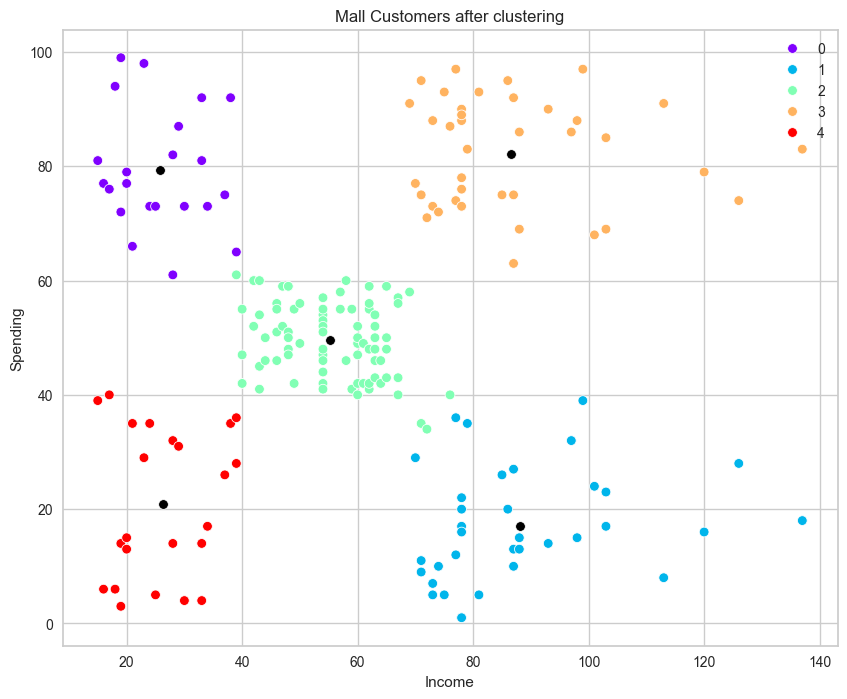

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=X, x='Income',y='Spending', hue='Labels', palette='rainbow')
sns.scatterplot(data=centroid, x='Income', y='Spending', color='black')
plt.title('Mall Customers after clustering')
plt.show()